In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

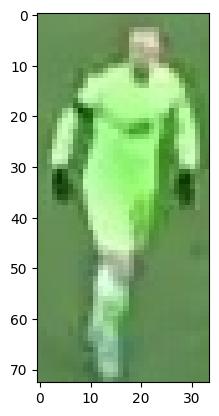

In [7]:
image_path = '../cropped_images/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

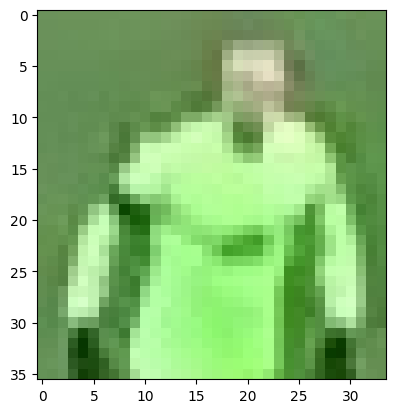

In [10]:
# TO HALF OF THE IMAGE
top_half = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half)

# Cluster the image into two clusters

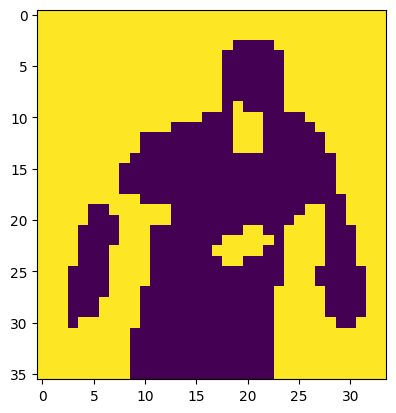

In [41]:
top_half_2d = top_half.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(top_half_2d)
clusters = kmeans.labels_

# Reshape the image into the original image shape
clustered_image = clusters.reshape(top_half.shape[0], top_half.shape[1])

# Plot the clustered image 
plt.imshow(clustered_image)
plt.show()

In [43]:
corners_clusters = clustered_image[0][0],clustered_image[0][-1],clustered_image[-1][0],clustered_image[-1][-1]
non_player_cluster = max(set(corners_clusters), key=corners_clusters.count)
print(non_player_cluster)

1


In [44]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [45]:
kmeans.cluster_centers_[player_cluster]

array([173.11041667, 237.82083333, 148.14583333])